In [47]:
import pandas as pd
from ast import literal_eval
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 
path='/Users/hj/Documents/github/crawling_textmining/' 
filename='test/naver_daum_total.csv'
dftemp=pd.read_csv(path+filename,encoding='utf-8')

In [48]:
dftemp=dftemp[['title','text','site','source','keyword','year']]
dftemp.dropna(axis=0,inplace=True)

In [49]:
import re
def textremove(x):
    pattern = '(http|ftp|https)://(?:[-\w.]|(?:%[\da-fA-F]{2}))+'
    text = re.sub(pattern=pattern, repl='', string=x)
    pattern = r'\([^)]*\)'
    text = re.sub(pattern=pattern, repl='', string=text)
    #print("괄호와 괄호안 글자 제거 :  " , text , "\n")
    pattern = '[^\w\s]'   
    text = re.sub(pattern=pattern, repl='', string=text)
    #print("특수기호 제거 : ", text , "\n" )
    text=re.sub('[^A-Za-z0-9가-힣]', ' ', text.upper())
    text = " ".join(text.split()).strip()
    return text
dftemp['text']=dftemp['text'].apply(lambda x:textremove(x))
dftemp['title']=dftemp['title'].apply(lambda x:textremove(x))

In [50]:
dftemp

,title,text,site,source,keyword,year
0,KTX노선도 전국,KTX노선도 전국 노선도를 알아봐요 다다음주부터 설날 KTX 예매가 시작되는데요 이...,daum,blog,KTX,2019
1,속초 KTX 스테이 레지던스 모델하우스,속초 KTX 스테이 레지던스 모델하우스 최근 현대인들은 삶의 질이 높아지며 여가와 ...,daum,blog,KTX,2019
2,KTX시간표 케이티엑스,하면 제자리라고 말씀드리고 앉으시면 되고요 코레일 홈페이지에서 좌석이랑 KTX시간표...,daum,blog,KTX,2019
3,KTX 노선도 최신판,오늘은 KTX 노선도 최신판을 준비했습니다 가까운 거리는 자차나 지하철 또는 버스를...,daum,blog,KTX,2019
4,KTX 예매 코레일톡,KTX 예매 코레일톡으로 간단하게 부산행 KTX를 타고 가고있습니다 처음 가보는 부...,daum,blog,KTX,2019
...,...,...,...,...,...,...
69052,인천시 내년 택시 승차대 확대내년 4월 베이형 설치,인천시가 택시 승차대 설치를 확대해 비가맹 택시개인택시 등의 수익구조를 개선하고 편...,naver,news,택시,2020
69053,죽으면 책임질게 구급차 가로막은 택시기사 징역 2년,응급환자를 이송 중이던 구급차를 상대로 고의사고를 내고 사고처리를 요구하며 막아선 ...,naver,news,택시,2020
69054,속보 구급차 막은 택시기사 1심서 징역 2년 실형,응급환자를 이송 중이던 구급차와 고의로 접촉사고를 낸 혐의로 구속기소된 택시기사가 ...,naver,news,택시,2020
69055,조현준 교수의 북한 이야기2도로 메운 폴크스바겐 택시,호텔 방에 있던 창문을 여니 라선 시내 모습이 눈앞에 펼쳐졌고 폴크스바겐 택시들이 ...,naver,news,택시,2020


In [51]:
# warnings.filterwarnings("ignore", category=DeprecationWarning) 
# warnings.filterwarnings("ignore", category=UserWarning) 
# dftemp.dropna(axis=0,inplace=True)
dftemp.isnull().sum()

title      0
text       0
site       0
source     0
keyword    0
year       0
dtype: int64

In [55]:
from kiwipiepy import Kiwi, Option
kiwi = Kiwi(num_workers=0, model_path='./', options=Option.LOAD_DEFAULT_DICTIONARY | Option.INTEGRATE_ALLOMORPH)

class ReaderExam:
    def __init__(self, filePath):
        self.file = open(filePath, encoding='utf-8')
    
    def read(self, id):
        if id == 0: self.file.seek(0)
        return self.file.readline()
dftemp['text'].apply(lambda x : x.upper().replace('[^ ㄱ-ㅣ가-힣|0-9|a-zA-Z]', " ")
                   ).to_csv('./test/kiwi_Word_Extract_ND.txt', index=False, header=None, encoding='utf-8' )
reader = ReaderExam('./test/kiwi_Word_Extract_ND.txt')

In [56]:
kiwiextracted=kiwi.extract_words(reader.read, min_cnt=100,max_word_len=15, min_score=0.2)
kiwiextracted

[('버스', 6.042980194091797, 56256, -1.895319938659668),
 ('KTX', 6.042146682739258, 11072, -2.226773738861084),
 ('시외버스터미널', 5.186124801635742, 3716, -2.712433099746704),
 ('고속버스터미널', 3.7661566734313965, 2214, -2.3916497230529785),
 ('터미널', 3.753477096557617, 9880, -2.4719958305358887),
 ('프리미엄', 3.681664228439331, 1374, -4.194092750549316),
 ('플랫폼', 3.5287539958953857, 279, -3.0229954719543457),
 ('도시철도', 3.265376567840576, 11648, -2.4819624423980713),
 ('NEWS', 3.069650173187256, 953, -3.834068536758423),
 ('대도시권광역교통위원회', 2.8237061500549316, 216, -1.8513000011444092),
 ('시내버스', 2.7637741565704346, 11239, -2.5623958110809326),
 ('교통', 2.6853883266448975, 9670, -1.4028376340866089),
 ('더불어민주당', 2.6264052391052246, 442, -3.7334024906158447),
 ('시외버스', 2.6191253662109375, 9873, -1.6297987699508667),
 ('한국철도시설공단', 2.609762668609619, 608, -2.1386771202087402),
 ('코로나19', 2.5718600749969482, 1511, -2.1245906352996826),
 ('HTTPS', 2.569754123687744, 832, -4.007253646850586),
 ('고속버스', 2.54280

In [57]:
def mkLocationList():
    newNouns=set()
    with open('./참고파일/지역명/철도역명.txt', encoding='utf-8') as f:
        for line in f:
            word=line.replace('\t','').replace('Noun','').strip('\n')
            if len(word)<2:continue
            newNouns.add(word)
    with open('./참고파일/지역명/법정동리명.txt', encoding='utf-8') as f:
        for line in f:
            word=line.replace('\t','').replace('Noun','').strip('\n')
            if len(word)<3 : continue
            newNouns.add(word)
    with open('./참고파일/지역명/시군구명.txt', encoding='utf-8') as f:    
        for line in f:
            word=line.replace('\t','').replace('Noun','').strip('\n')
            newNouns.add(word)

    return list(newNouns)

locations = mkLocationList()

def locationToken(tokens):
    for token in tokens:
        if token in locations:
            return 1
    return None
# locations = mkLocationList()
# locations

def mkNewWordList():
    newWordList=[]
    with open('./ckonlpy/사용자단어.txt' ,encoding='utf-8') as f:
        for line in f:
            newWordList.append(line)
    return newWordList

In [686]:
from konlpy.tag import Okt;okt=Okt()
from ckonlpy.utils import load_wordset,load_ngram,load_replace_wordpair
from ckonlpy.tag import Twitter
from ckonlpy.tag import Postprocessor
twitter=Twitter()

사용자단어=mkNewWordList()
지역명=mkLocationList()
twitter.add_dictionary(사용자단어, 'Noun')
twitter.add_dictionary(지역명, 'Noun')
twitter.add_dictionary(['버스위치'], 'Noun')
 
# ngrams=[(('동탄','신도시'),'Noun'),(('무정','차'),'Noun')]
replace = load_replace_wordpair('./ckonlpy/replace.txt')
ngrams = load_ngram('./ckonlpy/ngram.txt')
stopwords = load_wordset('./ckonlpy/stopwords.txt')
passwords = load_wordset('./ckonlpy/passwords.txt')

postprocessor = Postprocessor(
    base_tagger = twitter, # base tagger
    stopwords = stopwords, # 해당 단어 거르기
#     passwords = passwords, # 해당 단어만 선택
    passtags = {'Noun','Alpha','Number'},#, 'Verb'}, # 해당 품사만 선택
    replace = replace, # 해당 단어 set 치환
    ngrams = ngrams    # 해당 복합 단어 set을 한 단어로 결합
)

def mkToken(sent):#ngrams에서 ' - ' 로 단어가 붙어나오는걸 띄어쓰기삭제
    tmp=re.sub(pattern='[^ ㄱ-ㅣ가-힣|0-9|a-zA-Z]+', repl=' ', string=sent).strip()
    return [s.replace(' - ','') for s,v in postprocessor.pos(tmp.upper()) if len(s)>1]

sent='코로나19'
print(mkToken(sent),'    지역성 : ',locationToken(mkToken(sent)))

['코로나19']     지역성 :  None


In [409]:
sent=' 총사업비에서 2396억원을 투입 전철화했어요 사업을 착공하려고 18일입니다'
# print(mkToken(sent),'    지역성 : ',locationToken(mkToken(sent)))
postprocessor.pos(sent)

[('총사', 'Noun'),
 ('업비', 'Noun'),
 ('2396억원', 'Number'),
 ('투입', 'Noun'),
 ('전철', 'Noun'),
 ('사업', 'Noun'),
 ('착공', 'Noun'),
 ('18일', 'Number')]

In [411]:
dftemp['token']=dftemp['text'].apply(lambda x : mkToken(x))

In [65]:
dftemp['isLocation'] = dftemp['token'].apply(lambda x : locationToken(x))
dftemp['isLocation']

0        NaN
1        1.0
2        1.0
3        NaN
4        1.0
        ... 
69052    1.0
69053    1.0
69054    NaN
69055    NaN
69056    NaN
Name: isLocation, Length: 68968, dtype: float64

In [67]:
dftemp[dftemp['isLocation']==True]

,title,text,site,source,keyword,year,token,isLocation
1,속초 KTX 스테이 레지던스 모델하우스,속초 KTX 스테이 레지던스 모델하우스 최근 현대인들은 삶의 질이 높아지며 여가와 ...,daum,blog,KTX,2019,"[속초, KTX, 스테이, 레지던스, 모델하우스, 최근, 현대인, 아지, 여가, 문...",1.0
2,KTX시간표 케이티엑스,하면 제자리라고 말씀드리고 앉으시면 되고요 코레일 홈페이지에서 좌석이랑 KTX시간표...,daum,blog,KTX,2019,"[제자리, 말씀, 고요, 코레일, 홈페이지, 좌석, KTX, 시간표, 모두, 확인,...",1.0
4,KTX 예매 코레일톡,KTX 예매 코레일톡으로 간단하게 부산행 KTX를 타고 가고있습니다 처음 가보는 부...,daum,blog,KTX,2019,"[KTX, 예매, 코레일, 간단, 부산, KTX, 타고, 처음, 가보, 부산, 업무...",1.0
6,서울 오송 KTX 요금 총정리,서울 오송 KTX 요금을 오늘 포스팅에서 자세히 정리하여 알려드립니다 오늘은 서울 ...,daum,blog,KTX,2019,"[서울, 오송, KTX, 요금, 오늘, 포스팅, 자세, 리하, 오늘, 서울, 오송,...",1.0
11,KTX 할인받는방법 총정리,안녕하세요 세상의 모든 올팁모아 블로그입니다 이번글에서는 KTX 할인받는방법 총정리...,daum,blog,KTX,2019,"[안녕, 세상, 모든, 블로그, 입니다, 이번, KTX, 할인, 방법, 정리, 준비...",1.0
...,...,...,...,...,...,...,...,...
69048,지자체의 SR 파주시 천원택시 고객만족브랜드대상 수상,천원택시가 선정됐다 파주시청 SR에스알타임스 정순화 기자 파주시는 지난 27일 경기...,naver,news,택시,2020,"[천원, 택시, 선정, 파주시, SR, 에스, 타임스, 순화, 기자, 파주시, 지난...",1.0
69049,책임지겠다더니구급차 막은 택시기사 징역 2년에 항소,사설 구급차를 상대로 고의 사고를 낸 혐의로 1심에서 징역 2년을 선고받은 택시기사...,naver,news,택시,2020,"[사설, 구급차, 상대로, 고의, 사고, 혐의, 징역, 2년, 선고, 택시기사, 항...",1.0
69050,마스크 착용해 달라승차 거부당한 40대 택시기사 폭행,마스크를 착용하지 않고 택시를 타려던 40대가 승차 거부를 당하자 택시기사를 폭행한...,naver,news,택시,2020,"[마스크, 착용, 택시, 40, 대가, 승차거부, 당하, 택시기사, 폭행, 40, ...",1.0
69052,인천시 내년 택시 승차대 확대내년 4월 베이형 설치,인천시가 택시 승차대 설치를 확대해 비가맹 택시개인택시 등의 수익구조를 개선하고 편...,naver,news,택시,2020,"[인천, 시가, 택시, 승차, 설치, 확대, 가맹, 택시, 개인, 택시, 수익, 구...",1.0


### 블로그카페, 뉴스 통으로 나눠서!
### 개인적이야기 주로어떤이야기가 있는지, 

In [412]:
dfcb=dftemp.query("source=='cafe' or source=='blog'")
dfcb

,title,text,site,source,keyword,year,token,isLocation
0,KTX노선도 전국,KTX노선도 전국 노선도를 알아봐요 다다음주부터 설날 KTX 예매가 시작되는데요 이...,daum,blog,KTX,2019,"[KTX, 노선도, 전국, 노선도, 다음주, 설날, KTX, 예매, 시작, 기간, ...",NaN
1,속초 KTX 스테이 레지던스 모델하우스,속초 KTX 스테이 레지던스 모델하우스 최근 현대인들은 삶의 질이 높아지며 여가와 ...,daum,blog,KTX,2019,"[속초, KTX, 스테이, 레지던스, 모델하우스, 최근, 현대인, 아지, 여가, 문...",1.0
2,KTX시간표 케이티엑스,하면 제자리라고 말씀드리고 앉으시면 되고요 코레일 홈페이지에서 좌석이랑 KTX시간표...,daum,blog,KTX,2019,"[제자리, 말씀, 고요, 코레일, 홈페이지, 좌석, KTX, 시간표, 모두, 확인,...",1.0
3,KTX 노선도 최신판,오늘은 KTX 노선도 최신판을 준비했습니다 가까운 거리는 자차나 지하철 또는 버스를...,daum,blog,KTX,2019,"[오늘, KTX, 노선도, 신판, 준비, 까운, 거리, 자차, 지하철, 버스, 이용...",NaN
4,KTX 예매 코레일톡,KTX 예매 코레일톡으로 간단하게 부산행 KTX를 타고 가고있습니다 처음 가보는 부...,daum,blog,KTX,2019,"[KTX, 예매, 코레일, 간단, 부산, KTX, 처음, 가보, 부산, 업무, 때문...",1.0
...,...,...,...,...,...,...,...,...
59052,금정역에서 택시타려면 몇번 출구로 가야되나용,카카오택시 부를건데 가끔 다른 역에선 이상한 출구에서 택시 부르면 안잡히기도 하고 ...,naver,cafe,택시,2020,"[카카오, 택시, 가끔, 다른, 이상, 출구, 택시, 기도, 기사, 내시]",NaN
59053,혹시 택시로 수조 옮겨보신분,사정상 당분간 차를 못쓰게되었는데 2자광하나를 옮겨야하는데 들고오자니 빡시고 수레를...,naver,cafe,택시,2020,"[사정, 당분간, 자광, 하나, 오자, 수레, 사자, 택시, 이나, 만원, 정도, ...",NaN
59054,늦장 부리다 택시탔는데,택시가사 커브를 엑셀밟으면서 한다 방금 먹은 라면 도로 나올듯 다들 부지런히 삽시다...,naver,cafe,택시,2020,"[택시, 가사, 커브, 엑셀, 면서, 방금, 라면, 도로, 부지런, 처럼]",NaN
59055,불법 주정차 택시들로 인한 접촉사고시 과실여부,서울 SS역 뒷편에 보면 대기중인 택시들이 1KM는 족히 줄을 서 있습니다 문제는 ...,naver,cafe,택시,2020,"[서울, SS, 대기, 중인, 택시, KM, 문제, 왕복, 차선, 도로, 차선, 2...",1.0


In [413]:
dfnews=dftemp.query("source=='news'")
dfnews

,title,text,site,source,keyword,year,token,isLocation
19897,KTX 달린다,기자 철도노조가 파업을 철회하며 철도운행 정상화에 돌입한 26일 서울역에서 KTX열...,daum,news,KTX,2019,"[철도, 노조, 파업, 회하, 철도, 운행, 정상화, 돌입, 26일, 서울역, KT...",1.0
19898,역귀성 등 292개 KTX 반값KTX 설 특가상품 3031일 판매,서울역에서 KTX 타는 귀성객들 연합뉴스 자료사진 대전연합뉴스 유의주 기자 한국철도...,daum,news,KTX,2019,"[서울역, KTX, 귀성, 연합뉴스, 자료, 사진, 대전, 연합뉴스, 유의, 한국철...",1.0
19899,KTX 초특급 프리미엄의 맨 앞자리 서대구 KTX 영무예다음 29,대구의 부동산 시장만큼은 뜨거운 훈풍이 불고 있다 지난 9월 서대구 KTX 역세권 ...,daum,news,KTX,2019,"[대구, 부동산, 시장, 훈풍, 지난, 9월, 대구, KTX, 대개, 계획, 발표,...",1.0
19900,KTXSRT 통합연구용역 비밀리 재개,앵커 인력충원 문제를 놓고 이렇게 노사정이 팽팽히 맞서는 상황에서 KTX와 SRT의...,daum,news,KTX,2019,"[앵커, 인력, 문제, 노사, 정이, 팽팽히, 상황, KTX, SRT, 통합, 문제...",NaN
19901,KTX 김제 시대 개막KTX 김제역 정차 확정,배종윤 기자전주 김종회 의원이 13일 김제시청에서 기자회견을 갖고 KTX 김제역 시...,daum,news,KTX,2019,"[배종윤, 전주, 김종회, 의원, 13일, 김제시, 기자회견, KTX, 김제역, 시...",1.0
...,...,...,...,...,...,...,...,...
69052,인천시 내년 택시 승차대 확대내년 4월 베이형 설치,인천시가 택시 승차대 설치를 확대해 비가맹 택시개인택시 등의 수익구조를 개선하고 편...,naver,news,택시,2020,"[인천, 시가, 택시, 승차, 설치, 확대, 가맹, 택시, 개인, 택시, 수익, 구...",1.0
69053,죽으면 책임질게 구급차 가로막은 택시기사 징역 2년,응급환자를 이송 중이던 구급차를 상대로 고의사고를 내고 사고처리를 요구하며 막아선 ...,naver,news,택시,2020,"[응급환자, 이송, 중이, 구급차, 상대로, 고의, 사고, 사고, 처리, 요구, 택...",1.0
69054,속보 구급차 막은 택시기사 1심서 징역 2년 실형,응급환자를 이송 중이던 구급차와 고의로 접촉사고를 낸 혐의로 구속기소된 택시기사가 ...,naver,news,택시,2020,"[응급환자, 이송, 중이, 구급차, 고의, 접촉, 사고, 혐의, 구속기소, 택시기사...",NaN
69055,조현준 교수의 북한 이야기2도로 메운 폴크스바겐 택시,호텔 방에 있던 창문을 여니 라선 시내 모습이 눈앞에 펼쳐졌고 폴크스바겐 택시들이 ...,naver,news,택시,2020,"[호텔, 창문, 여니, 라선, 시내, 모습, 눈앞, 폴크스바겐, 택시, 대기, 라선...",NaN


### dfcb : 카페 + 블로그
### dfnews : 뉴스
#### 음 혹시모르니 2019년 2020년 나눠서 진행하자

In [414]:
dfcb2019=dfcb.query("year==2019 ")
dfcb2020=dfcb.query("year==2020")
dfnews2019=dfnews.query("year==2019")
dfnews2020=dfnews.query("year==2020")

In [662]:
df=dfnews2020
df['token']=df['text'].apply(lambda x: mkToken(x))

<ipython-input-662-a5e010d9a5bb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['token']=df['text'].apply(lambda x: mkToken(x))


## WordCloud

In [88]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

In [692]:
#1차원 리스트로 풀어주기 ->  For Word Counting
texts_1d=[]
for i in df['token']:
    for j in i:
        if j=='코로나19':texts_1d.append('코로나바이러스')
        else: texts_1d.append(j)
#     texts_1d.extend(i)
# for i in dfsin['hktoken']:    
#     texts_1d.extend(changeKeyword(i))
    
#         texts_1d.extend(i)

texts_1d

['KBS',
 '강릉',
 '강릉',
 'KTX',
 '정차',
 '사례',
 '크게',
 '한국',
 '철도공사',
 '2018년',
 '12월',
 '강릉역',
 '인근',
 '탈선',
 '사고',
 '이후',
 '지난해',
 '올해',
 '강릉',
 'KTX',
 '정식',
 '역사',
 'KTX',
 '신경주역',
 '신도시',
 '개발',
 '사업',
 '주거',
 '용지',
 '주상',
 '복합',
 '용지',
 '입찰',
 '공고',
 '30일',
 '한국',
 '자산',
 '관리',
 '공사',
 '전자',
 '자산',
 '처분',
 '시스템',
 '온비드',
 '통해',
 '진행중',
 '이번',
 '불어',
 '민주당',
 '대표',
 '지난달',
 '30일',
 '전남',
 '무늬',
 '고속',
 '철로',
 '불리',
 '전라선',
 'KTX',
 '지역',
 '핵심',
 '사업',
 '예산',
 '지원',
 '약속',
 '다사',
 '대표',
 '김영록',
 '위원회',
 '적정',
 '의결',
 '민간',
 '기업',
 '특혜',
 '논란',
 '위해',
 '수익금',
 '사회',
 '환원',
 '방식',
 '고심',
 '울산',
 'KTX',
 '배후',
 '지역',
 '울주군',
 '삼남면',
 '복합',
 '화단',
 '도시',
 '개발',
 '사업',
 '추진',
 '공공',
 '민간',
 '정화',
 '기간',
 '1일',
 '일임',
 '불구',
 '자연보호',
 '협의',
 '회장',
 '애순',
 '주관',
 'KTX',
 '김천역',
 '주변',
 '환경',
 '정화',
 '활동',
 '아침',
 '일찍',
 '율곡동',
 '주민',
 '센터',
 '회원',
 '인사말',
 '뉴시',
 '이낙연',
 '불어',
 '민주당',
 '대표',
 '30일',
 '광주',
 '전라선',
 'KTX',
 '국가',
 '사업',
 '포함',
 '내년',
 '호남',
 '예산',
 '대폭',
 '반영',
 '약속',
 '극적',


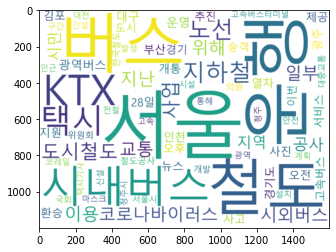

In [693]:
count = Counter(texts_1d)
tags = {}
for n, c in count.most_common(75):
    tags[n] = c

wc = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
               width=800, height=600, scale=2.0, max_font_size=200, background_color="#ffffff")
#plt.rc('font', family='Nanum Gothic')

gen = wc.generate_from_frequencies(tags)
plt.figure()
plt.imshow(gen, interpolation='bilinear')
plt.show()

wc.to_file('./png/네다_뉴스_2020_.png')

#plt.close()


## Networkx __연관성분석

In [600]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 
import networkx as nx

In [694]:
삭제리스트=['어서','위해','까지','다가','면서','출처','기자','오후','오전']
def changeKeyword(i):
    tmp=[]
    for key in i:
        if key in 삭제리스트:
            continue
        elif key=='코로나19':tmp.append('코로나바이러스')
        else:tmp.append(key)
    return tmp
dataset=[]
for i in df['token']:
# for i in dfsin['hktoken']:    
#     dataset.append(i)
    dataset.append(changeKeyword(i))
# dataset

In [94]:
from apyori import apriori

In [753]:
# # 연관 분석을 수행합니다.
results = list(apriori(dataset,
    min_support=0.02,
    min_confidence=0.2,
    min_lift=0.5,
    max_length=2))


In [420]:
node_df

,node,nodesize
2,KTX,1687
7,철도공사,510
13,사고,622
23,사업,1517
31,까지,987
34,공사,908
41,이번,513
52,지역,829
55,지원,596
59,위원회,507


In [754]:
from collections import Counter
from math import log

# 데이터 프레임 형태로 정리합니다.
columns = ['source', 'target', 'support']
network_df = pd.DataFrame(columns=columns)

### Apriori 알고리즘을, Dataframe으로 변환
# 규칙의 조건절을 source, 결과절을 target, 지지도를 support 라는 데이터 프레임의 피처로 변환합니다.
for result in results:
    if len(result.items) == 2:
        items = [x for x in result.items]
        row = [items[0], items[1], result.support]
        series = pd.Series(row, index=network_df.columns)
        network_df = network_df.append(series, ignore_index=True)

print(network_df)

#### Node 사이즈를 만들어주기위한 부분
dataset1d=[]

for i in dataset:
    dataset1d.extend(i)

count = Counter(dataset1d)

node_df = pd.DataFrame(count.items(), columns=['node', 'nodesize'])
#원본
# node_df = node_df[node_df['nodesize'] >= 5] # 시각화의 편의를 위해 ‘nodesize’ 5 이하는 제거합니다.
# 중복ON,전국,통합년도
# node_df = node_df[node_df['nodesize'] >= len(dataset)/112] 
node_df = node_df[node_df['nodesize'] >= 400] 

#데이터가 너무 많아서 (Node size가 터무니없이 크지 않도록)
# node_df['nodesize']=node_df['nodesize'].apply(lambda x:log(x)*log(x))



# node_df = node_df[node_df['nodesize']>=2] ##데이터 30~40개일때
# print(node_df.head())

     source   target  support
0        열차      KTX   0.0218
1       감염증  코로나바이러스   0.0210
2      광역버스      경기도   0.0217
3       경기도       운행   0.0209
4        공사       교통   0.0307
5        공사     도시철도   0.0373
6        공사       사장   0.0265
7        공사       서울   0.0317
8       지하철       공사   0.0210
9        노선     광역버스   0.0314
10       버스     광역버스   0.0324
11     광역버스       운행   0.0256
12       국회       교통   0.0212
13       서울       교통   0.0321
14      위원회       교통   0.0215
15       국가       철도   0.0266
16       국회      민주당   0.0200
17       국회       불어   0.0200
18       김포     도시철도   0.0248
19       노선     시내버스   0.0329
20       노선       신설   0.0205
21       노선       운행   0.0409
22       노선       일부   0.0324
23     도시철도       노조   0.0230
24  코로나바이러스       대구   0.0206
25       버스     대중교통   0.0201
26     철도공사       도시   0.0330
27       사장     도시철도   0.0255
28       불어      민주당   0.0311
29       버스     시내버스   0.0282
30       버스     시외버스   0.0281
31       버스       운행   0.0376
32       이

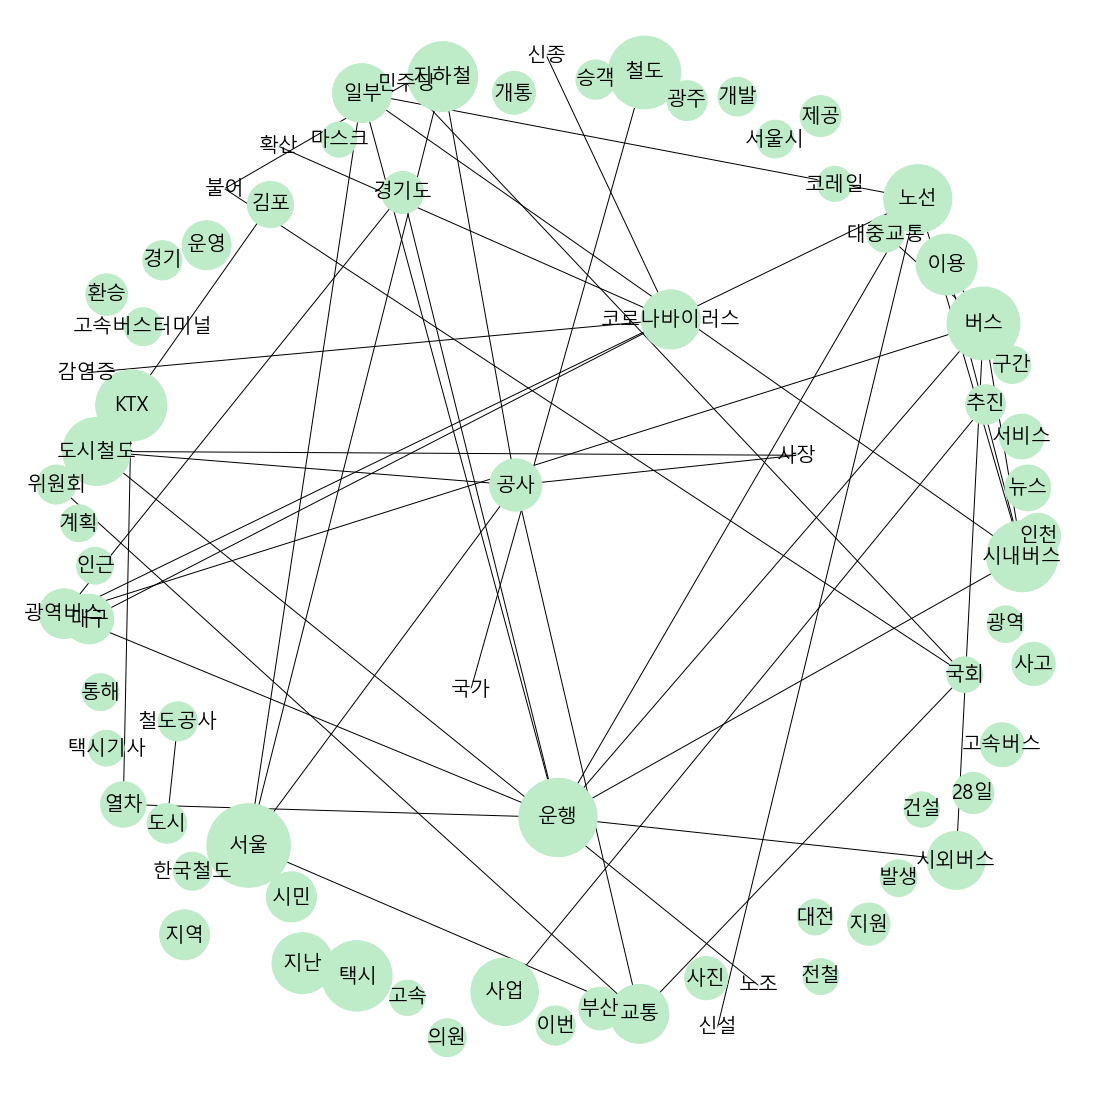

In [756]:
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.figure(figsize=(15,15))

# networkx 그래프 객체를 생성합니다.
G = nx.Graph()

# pr=nx.pageranke(G)

# node_df의 키워드 빈도수를 데이터로 하여, 네트워크 그래프의 ‘노드’역할을 하는 원을 생성합니다.
for index, row in node_df.iterrows():
    G.add_node(row['node'], nodesize=row['nodesize'])

# network_df의 연관 분석 데이터를 기반으로, 네트워크 그래프의 ‘관계’역할을 하는 선을 생성합니다.
for index, row in network_df.iterrows():
    G.add_weighted_edges_from([(row['source'], row['target'], row['support'])])

# 그래프 디자인과 관련된 파라미터를 설정합니다. 
# # original
# pos = nx.spring_layout(G, k=0.6, iterations=50)
# sizes = [G.nodes[node]['nodesize']*30 for node in G]
# #
# #원형
# pos = nx.spring_layout(G, k=0.41, iterations=50)#2019

pos = nx.spring_layout(G, k=0.5 , iterations=50)#2020
##kameda 써보기
# pos = nx.kamada_kawai_layout(G)
# #
# pos=nx.planar_layout(G)
# pos=nx.random_layout(G)
ncolor2020='#BEEBC8'
ncolor2019='#C9D7F5'

# sizes = [G.nodes[node]['nodesize']*len(dataset)*0.01 for node in G] #사이즈
# sizes = [G.nodes[node]['nodesize']*5 for node in G] #사이즈
sizes=[]
for node in G:
    try:
        sizes.append(G.nodes[node]['nodesize']*3)#*1.8)
    except:
        sizes.append(1)


# nx.draw(G, pos=pos, node_size=sizes, node_color=ncolor2019)
nx.draw(G, pos=pos, node_size=sizes, node_color=ncolor2020)

nx.draw_networkx_labels(G, pos=pos, font_family="Malgun Gothic", font_size=20)

# kamada_kawai 써보기!
# nx.kamada_kawai_layout(G)

# 그래프를 출력합니다.
ax = plt.gca()
plt.show()


In [743]:
## 4.1 네트워크 분석된 것의 키워드에 대한 연관성 추출
def mkNetworkWeight(network,keyword):
    forkey=pd.DataFrame(network[keyword].items(),columns=['keyword','Weight'])#.sort_values(by=['Weight'])
    forkey['Weight']=forkey['keyword'].apply(lambda x: network[keyword][x]['weight'])
    return forkey.sort_values(by=['Weight'],ascending=False)


## 노선,차량,정류장,운전기사 + 수단들

mkNetworkWeight(G,'코로나바이러스')

,keyword,Weight
5,확산,0.0216
0,감염증,0.0210
3,신종,0.0209
1,대구,0.0206
2,시외버스,0.0188
4,운행,0.0185
